In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import random 
import numpy.random as rand
from random import randrange
from scipy.stats import bernoulli, binom
from sklearn.linear_model import LinearRegression
import scipy.linalg as spla

# 3. Generate simulation study 

## 3.1. RCT simulation

In [66]:
# Observations
random.seed(10)
n = 100

In [67]:
alpha = [1,2]
beta = [1,2]
gamma = [0.5,0.75]

# Anonymous function , ft , which takes arguments t and x and returns the expression on the rhs
ft = lambda t,x : alpha[t] + beta[t]*x + gamma[t]*x*x

In [68]:
def mutlivariate_normal_sampler(mean,covariance,n_samples):
  # compute cholesky decomposition of covariance matrix
  L = spla.cholesky(covariance)
  # Generate white guassian noise, 
  Z = np.random.normal(size=(n_samples,covariance.shape[0]))
  return Z.dot(L)+mean


In [72]:
# Generate variables (Measured covariates, unmeasured covariates , binary treatment and assignment).

d_rct1 = pd.DataFrame()

# Lalonde dataset
df = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/nsw.dta")
del df['data_id']
del df['treat']
del df['re78']
# Get covariance matrix from data
cov_matrix = df.cov()

# Pre-treatment covariates
mu = 0
sigma = 1

d_rct1['X1'] = np.random.normal(mu,sigma , size = (n,))
d_rct1['X2'] = np.random.normal(mu,sigma , size = (n,))
d_rct1['X3'] = np.random.normal(mu,sigma , size = (n,))
d_rct1['X4'] = np.random.normal(mu,sigma , size = (n,))
d_rct1['X5'] = np.random.normal(mu,sigma , size = (n,))
d_rct1['X6'] = np.random.normal(mu,sigma , size = (n,))
d_rct1['X7'] = np.random.normal(mu,sigma , size = (n,))

array = mutlivariate_normal_sampler(mu,cov_matrix,n_samples=n)
row_index = pd.RangeIndex(range(array.shape[0]))
col_index = pd.RangeIndex(range(array.shape[1]))
df_rct = pd.DataFrame(data=array, index = row_index,columns= col_index)
df_rct.columns = ['X1', 'X2', 'X3', 'X4', 'X5','X6','X7']

# Binary treatment assignment W (drawn from bernoulli dsitribution with p = 0.5 )
p_bernoulli = 0.5
W_uniform = np.random.rand(n) #treatment from uniform distribution
#d_rct['W'] = (W_uniform <= p_bernoulli).astype(np.int) # transform to bernoulli

# Error term 

#epsilon_rct = np.random.normal(mu,sigma , size = (n,))

# Outcome 

#het = 1 + d_rct['X1'] + d_rct['X1']**2 + d_rct['X2'] + d_rct['X2']**2 # Heterogenity of treatment effect
#d_rct['Y'] = d_rct['W']*het+ d_rct.sum(axis=1) + epsilon_rct 




In [73]:
corr = df_rct.corr()
corr.style.background_gradient(cmap='coolwarm')

,X1,X2,X3,X4,X5,X6,X7
X1,1.000000,0.015851,0.112775,-0.199410,0.191001,-0.115483,0.022255
X2,0.015851,1.000000,0.051699,-0.018989,-0.012376,-0.640858,0.121981
X3,0.112775,0.051699,1.000000,-0.758772,0.070011,0.061460,-0.115469
X4,-0.199410,-0.018989,-0.758772,1.000000,-0.114895,0.007676,0.077121
X5,0.191001,-0.012376,0.070011,-0.114895,1.000000,-0.007889,0.143307
X6,-0.115483,-0.640858,0.061460,0.007676,-0.007889,1.000000,-0.007545
X7,0.022255,0.121981,-0.115469,0.077121,0.143307,-0.007545,1.000000


In [46]:
corr = d_rct1.corr()
corr.style.background_gradient(cmap='coolwarm')

,X1,X2,X3,X4,X5,X6,X7
X1,1.000000,0.046318,-0.132151,-0.029971,-0.064416,0.109736,-0.014862
X2,0.046318,1.000000,-0.036107,-0.010687,0.007439,-0.127783,-0.033090
X3,-0.132151,-0.036107,1.000000,-0.152815,0.031890,-0.059346,0.124505
X4,-0.029971,-0.010687,-0.152815,1.000000,-0.176915,0.041393,-0.146502
X5,-0.064416,0.007439,0.031890,-0.176915,1.000000,-0.142861,-0.032411
X6,0.109736,-0.127783,-0.059346,0.041393,-0.142861,1.000000,-0.083052
X7,-0.014862,-0.033090,0.124505,-0.146502,-0.032411,-0.083052,1.000000


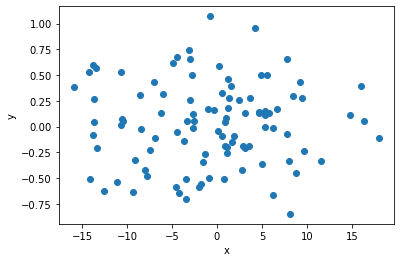

In [58]:
plt.scatter(df_rct['X1'],df_rct['X3'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

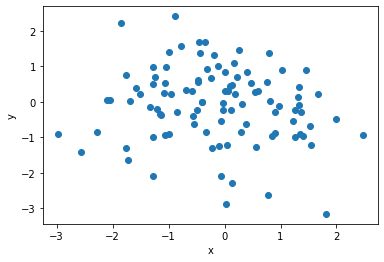

In [57]:
plt.scatter(d_rct1['X1'],d_rct1['X3'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
regressor = LinearRegression()
regressor.fit(x,y)
y_pred = regressor.predict(x)
df_preds = pd.DataFrame({'Actual': y.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

       Actual  Predicted
0    2.214664   4.527921
1   -1.441297   0.598434
2    8.269342   3.216671
3    2.282052   2.796535
4   -0.043611  -1.043980
..        ...        ...
95   0.575603   1.317514
96  -1.618608   0.785541
97  -4.172743   0.739179
98   2.611232   2.248225
99  10.701466   4.691295

[100 rows x 2 columns]


In [75]:
df = pd.read_stata("/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/nsw.dta")

In [83]:
df[20:30]

,data_id,treat,age,education,black,hispanic,married,nodegree,re75,re78
20,Lalonde Sample,1,23,11,1,0,0,1,0.000000,0.000000
21,Lalonde Sample,1,41,14,0,0,0,0,0.000000,5149.500977
22,Lalonde Sample,1,38,9,0,0,0,1,0.000000,6408.950195
23,Lalonde Sample,1,24,11,1,0,0,1,0.000000,1991.400024
24,Lalonde Sample,1,33,11,1,0,0,1,7867.916016,6281.433105
25,Lalonde Sample,1,18,10,1,0,0,1,0.000000,11163.169922
26,Lalonde Sample,1,29,11,1,0,1,1,0.000000,9642.999023
27,Lalonde Sample,1,25,11,1,0,0,1,0.000000,9897.048828
28,Lalonde Sample,1,27,10,0,1,0,1,0.000000,11142.870117
29,Lalonde Sample,1,17,10,1,0,0,1,0.000000,16218.040039
